# Look At The Big Picture
The problem is Regression (price pediction) ~ continous value


Type of machine learning : Supervised learning

In [1]:
# imports main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

#  Get the data

In [7]:
#reading train Data
diamond_data = pd.read_csv("train.csv")

In [9]:
print(diamond_data .shape)

(43152, 11)


# Explore the Data

In [10]:
# Checking for missing values and categorical variables in the dataset
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


There are 53940 non-null values in all the attributes thus no missing values.
Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms.





In [11]:
diamond_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


About the data (Description of attributes)
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.

cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.

color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.

table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.

price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.

x (0 - 10.74): Length of the diamond (in mm)

y (0 - 58.9): Width of the diamond (in mm)

z (0 - 31.8): Depth of the diamond (in mm)

#### There's an unecessary column which needs to be dropped

In [12]:
diamond_data = diamond_data.drop(["Id"],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [13]:
#Checking for duplicate records in the data
dups = diamond_data .duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(diamond_data .shape)

Number of duplicate rows = 97
(43152, 10)


In [14]:
print('Before',diamond_data.shape)
diamond_data.drop_duplicates(inplace=True) 
print('After',diamond_data.shape)

Before (43152, 10)
After (43055, 10)


In [15]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


## 1.2. Univariate and Bivariate Data Exploration
<a id="data_handling1.2" >

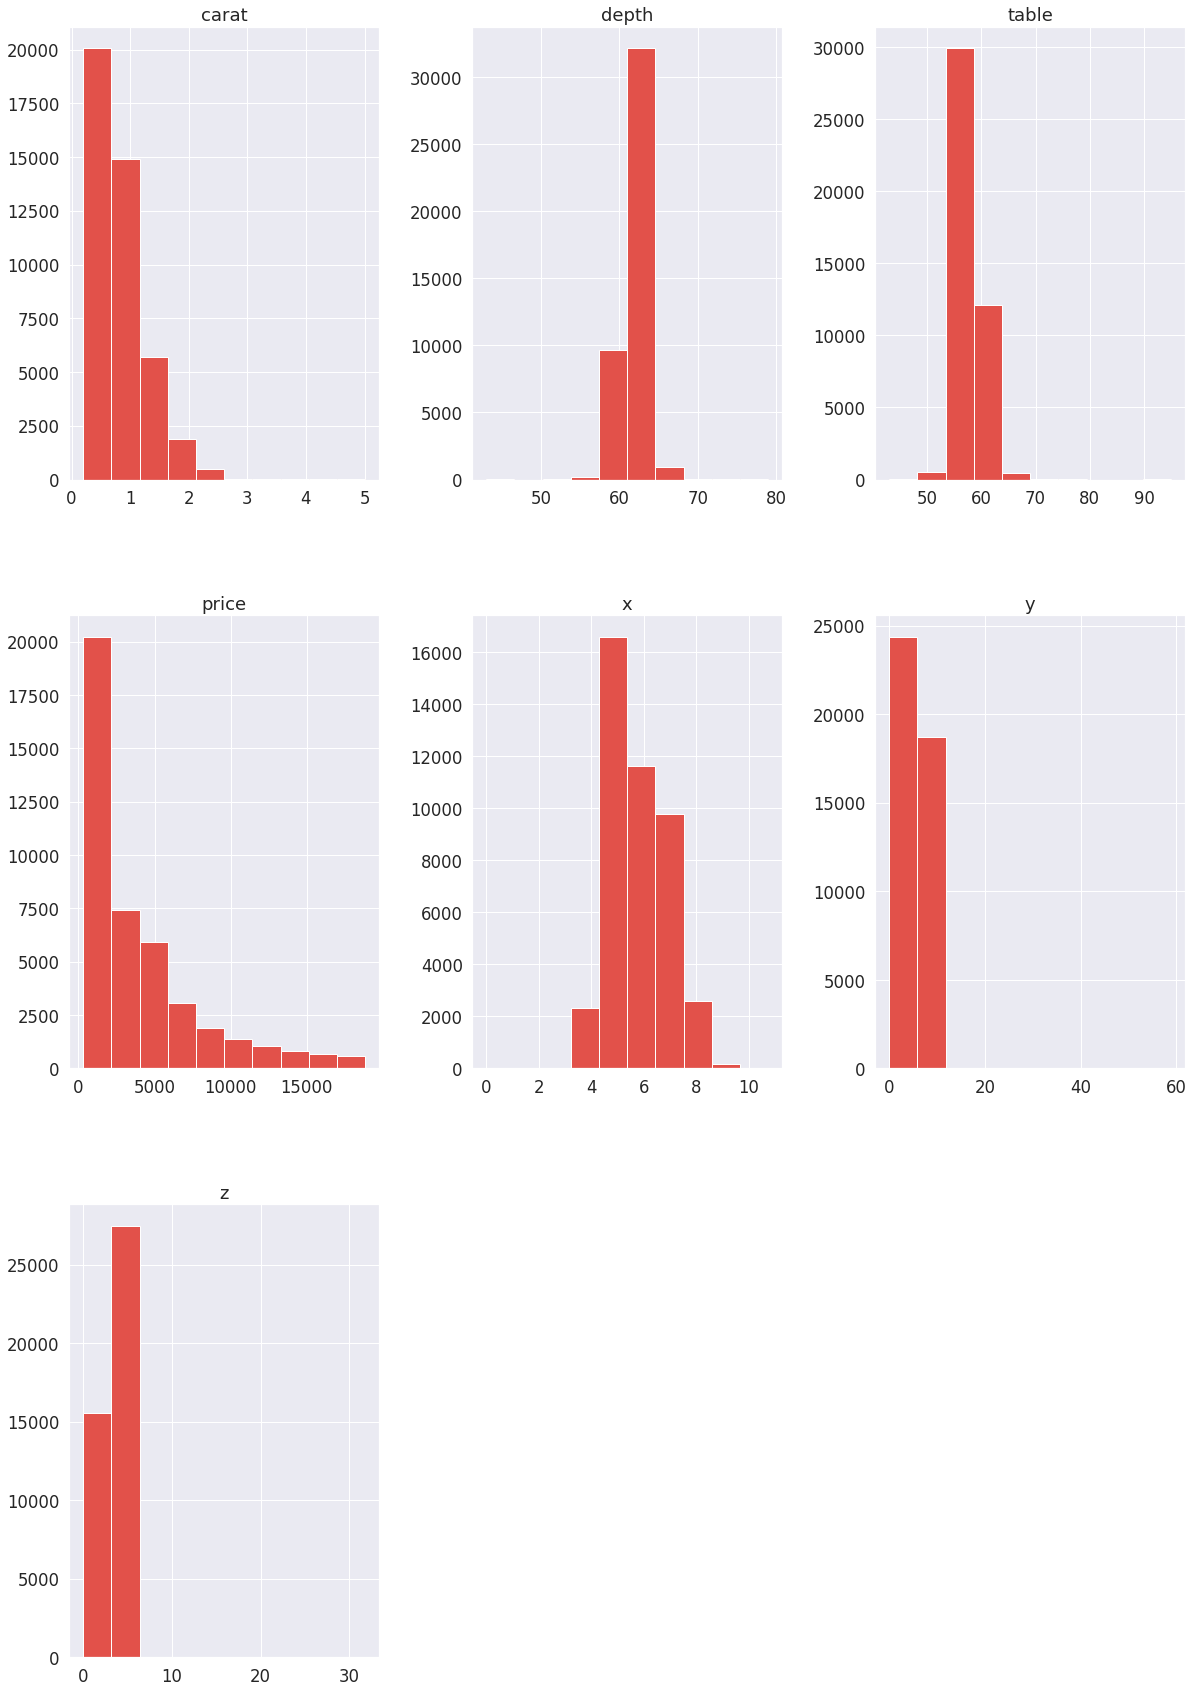

In [ ]:
diamond_data.hist(figsize=(20,30));

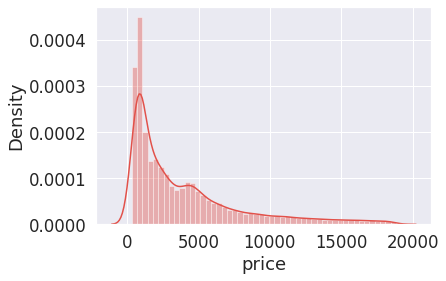

In [ ]:
# since target is continous value its a regression
sns.distplot(diamond_data.price)

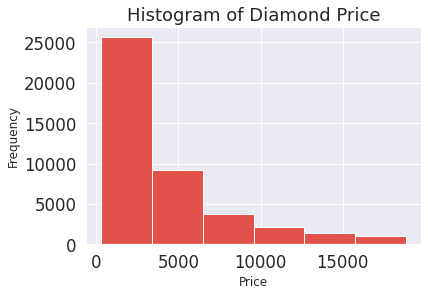

In [ ]:
# #specify the bins (bar) for histogram

plt.hist(diamond_data['price'], bins=6)

#define labels and title

plt.title('Histogram of Diamond Price')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

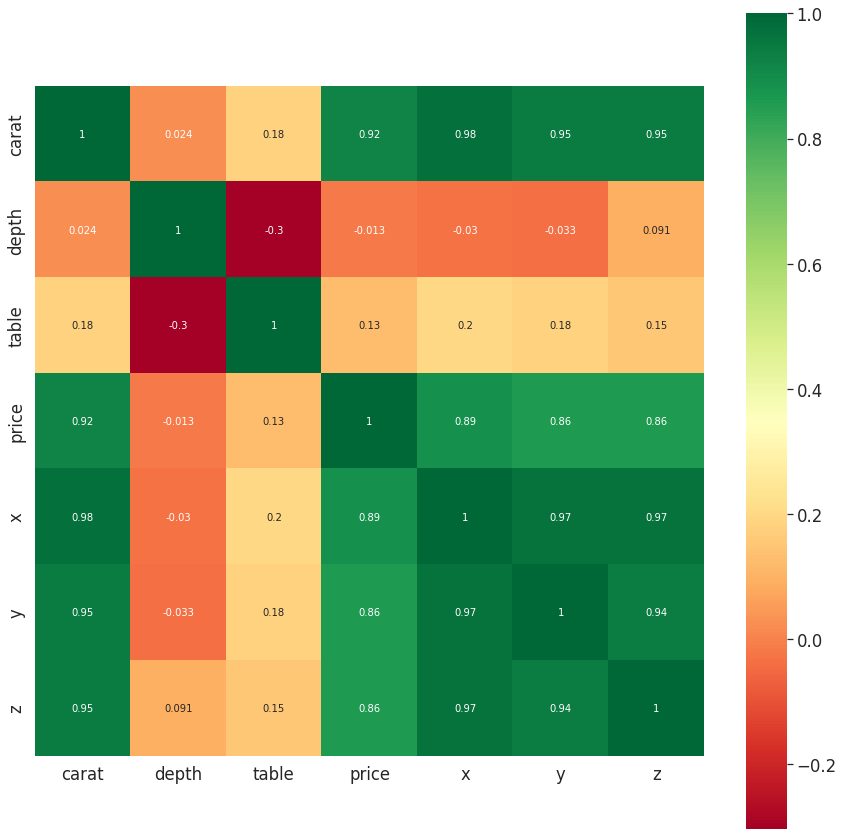

In [ ]:
plt.figure(figsize=(15,15))  # on this line I just set the size of figure to 15 by 15.
p=sns.heatmap(diamond_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

### Few observations from the above plot
1. x,y, and z have a very strong relation with price but surprisingly depth (which comes from x,y, and z) doesn't has a significant relation with price.
2. Carat has a strong relation with price
3. Table doesn't have a significant relation with price or any other variable as well ( We can try dropping that when making the model) 

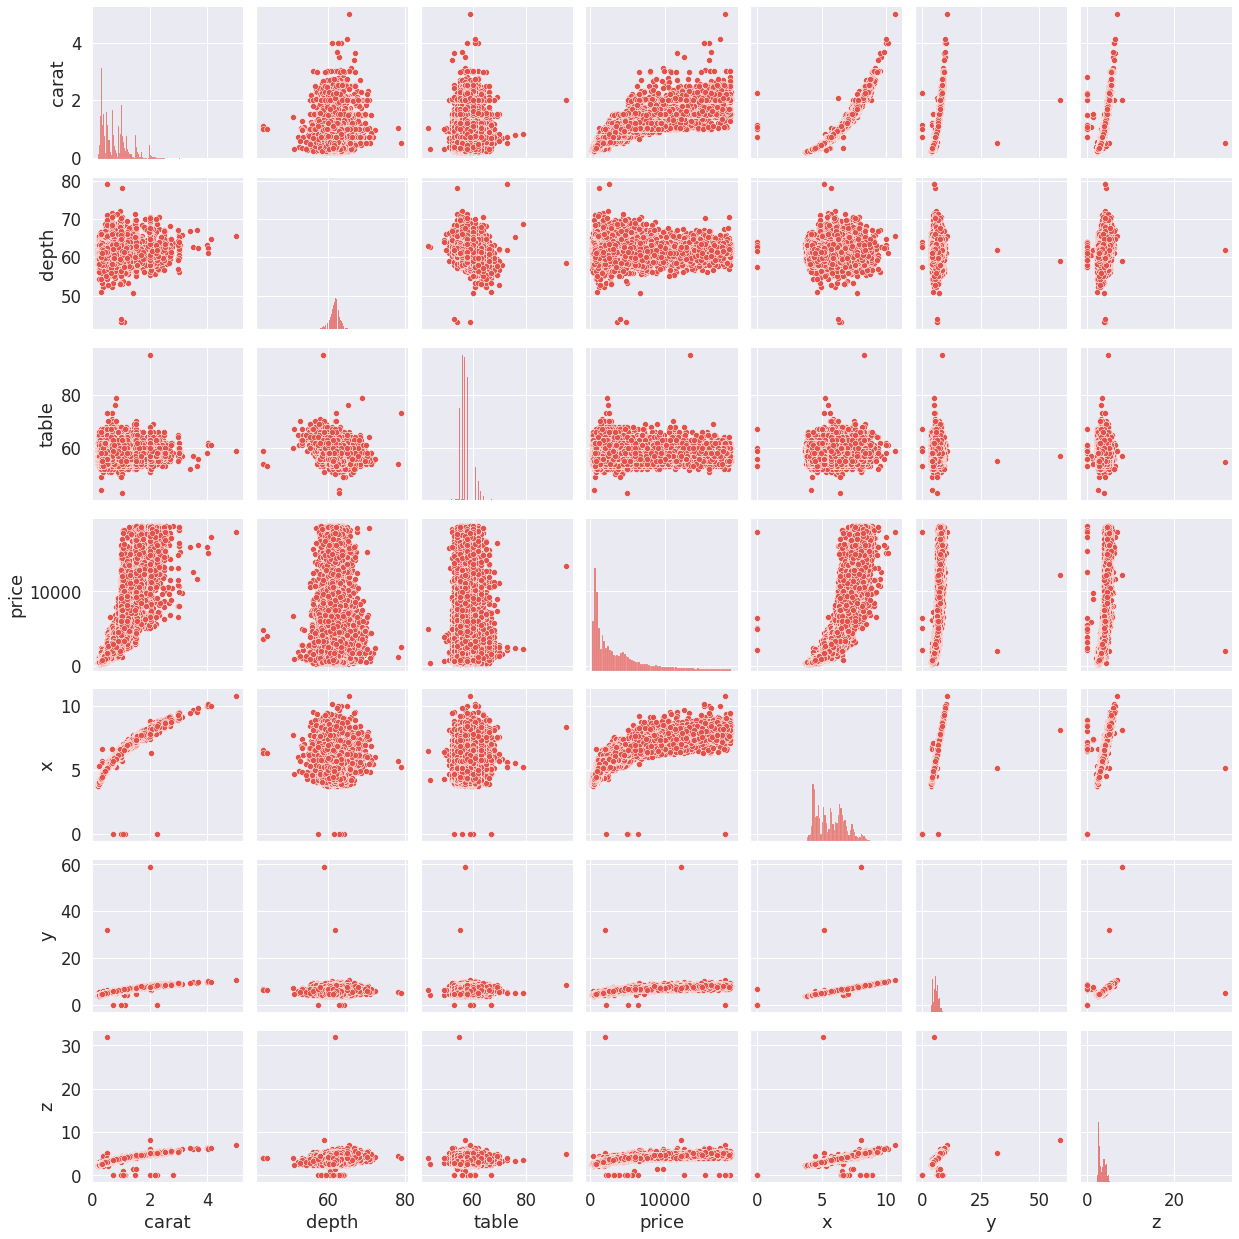

In [ ]:
p=sns.pairplot(diamond_data)

In [ ]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
diamond_data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,43055.0,0.797752,0.473198,0.2,0.40,0.70,1.04,5.01
depth,43055.0,61.746373,1.435066,43.0,61.00,61.80,62.50,79.00
table,43055.0,57.459798,2.234325,43.0,56.00,57.00,59.00,95.00
price,43055.0,3930.016235,3984.939986,326.0,948.00,2401.00,5312.50,18823.00
x,43055.0,5.731555,1.120732,0.0,4.71,5.70,6.54,10.74
y,43055.0,5.735063,1.148389,0.0,4.72,5.71,6.54,58.90
z,43055.0,3.538528,0.707922,0.0,2.91,3.53,4.04,31.80


### The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [ ]:
print("Number of rows with x == 0: {} ".format((diamond_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_data.depth==0).sum()))

Number of rows with x == 0: 5 
Number of rows with y == 0: 4 
Number of rows with z == 0: 17 
Number of rows with depth == 0: 0 


In [ ]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10788.0,5394.500000,3114.371686,1.0,2697.7500,5394.50,8091.25,10788.00
carat,10788.0,0.798279,0.475700,0.2,0.4000,0.70,1.04,4.50
depth,10788.0,61.758315,1.421266,54.0,61.1000,61.80,62.50,79.00
table,10788.0,57.452531,2.236933,50.0,56.0000,57.00,59.00,73.00
x,10788.0,5.729514,1.123736,0.0,4.7200,5.70,6.54,10.23
y,10788.0,5.732559,1.115090,0.0,4.7275,5.71,6.54,10.16
z,10788.0,3.539398,0.695483,0.0,2.9100,3.52,4.03,6.72


### A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only.

In [16]:
# Dropping dimentionless diamonds from train data
diamond_data=diamond_data.drop(diamond_data[diamond_data["x"]==0].index)
diamond_data=diamond_data.drop(diamond_data[diamond_data["y"]==0].index)
diamond_data=diamond_data.drop(diamond_data[diamond_data["z"]==0].index)
diamond_data.shape

(43038, 10)

### What to do with the zero's in x,y and z?

Since the dataset is big enough dropping 20 rows shouldn't cost us much hence the nans have been dropped.

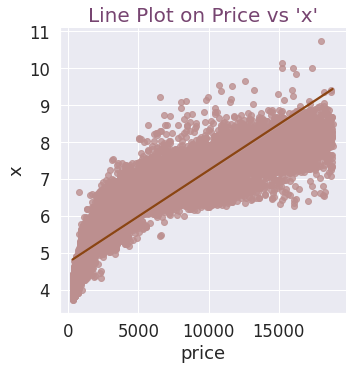

In [18]:
lm = sns.lmplot(x="price", y="x", data=diamond_data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'x'", color="#774571", fontsize = 20)
plt.show()

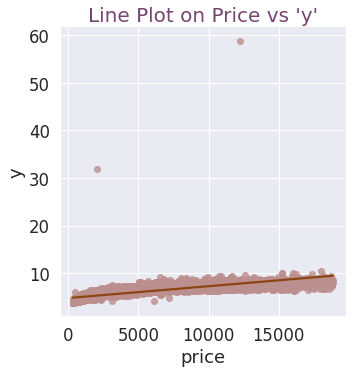

In [ ]:
lm = sns.lmplot(x="price", y="y", data=diamond_data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

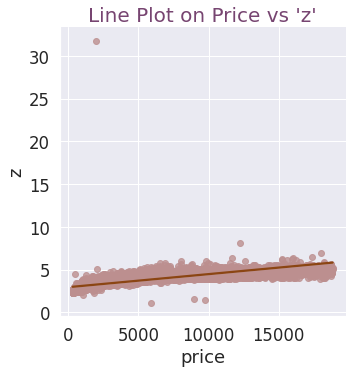

In [ ]:
lm = sns.lmplot(x="price", y="z", data=diamond_data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

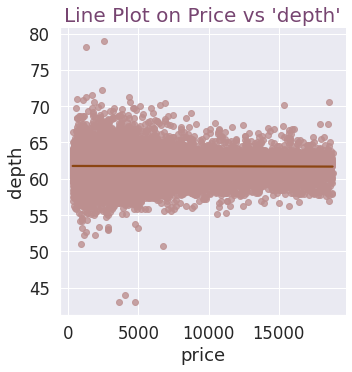

In [ ]:
lm = sns.lmplot(x="price", y="depth", data=diamond_data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

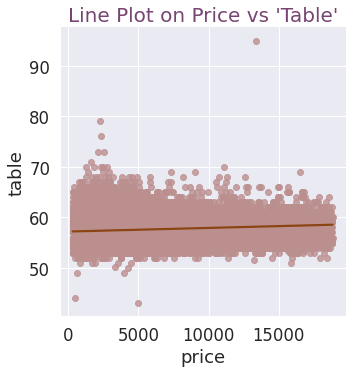

In [ ]:
lm = sns.lmplot(x="price", y="table", data=diamond_data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

`In the Line plots of above features, we can easily spot the outliers which we'll drop before feeding the data to the algorithm.`

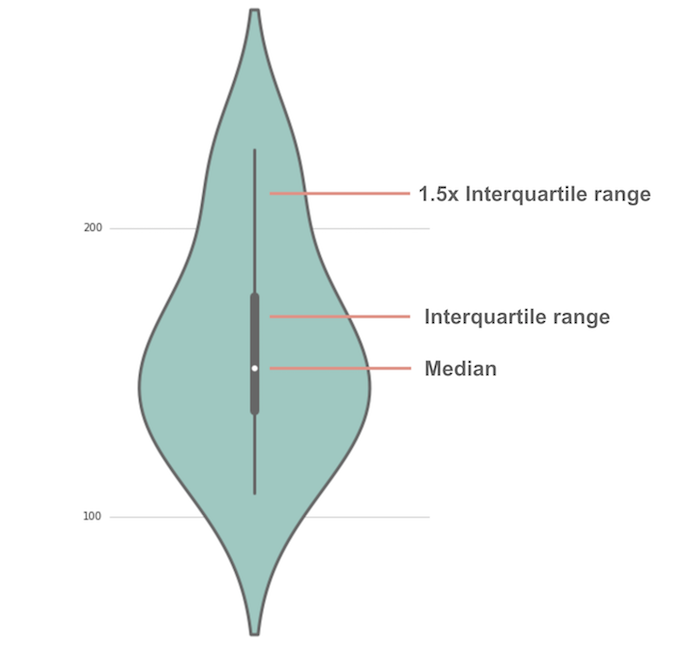
## 1.4. Categorical Data Essense
<a id="data_handling1.4" >

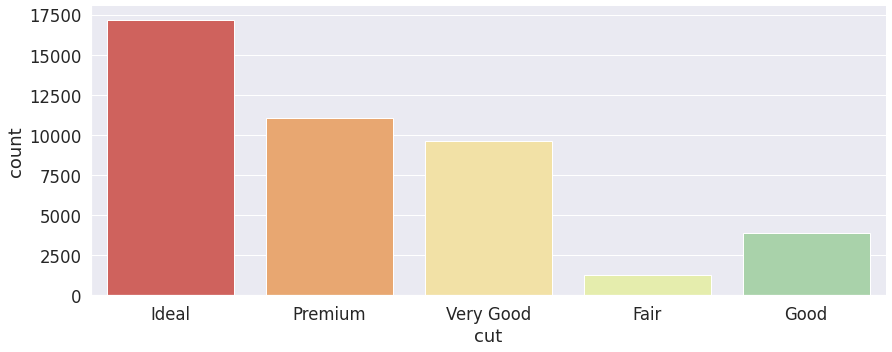

In [ ]:
p = sns.factorplot(x='cut', data=diamond_data , kind='count',aspect=2.5 )

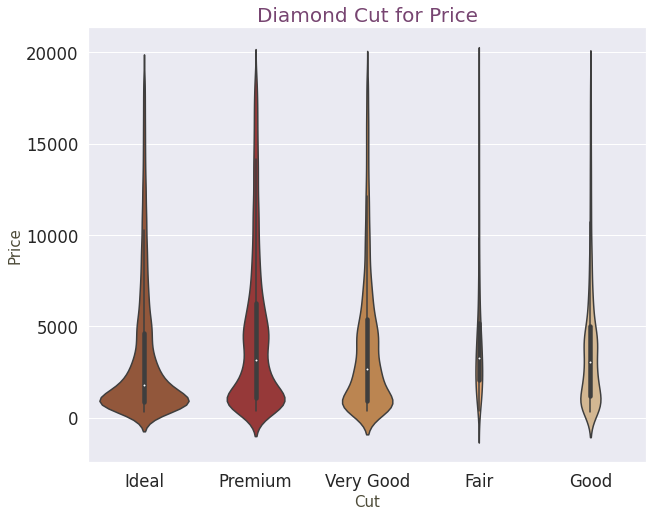

In [ ]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=diamond_data, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

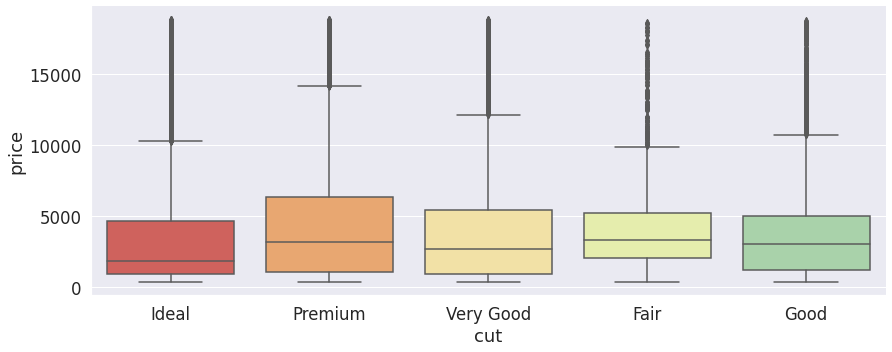

In [ ]:
p = sns.factorplot(x='cut', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

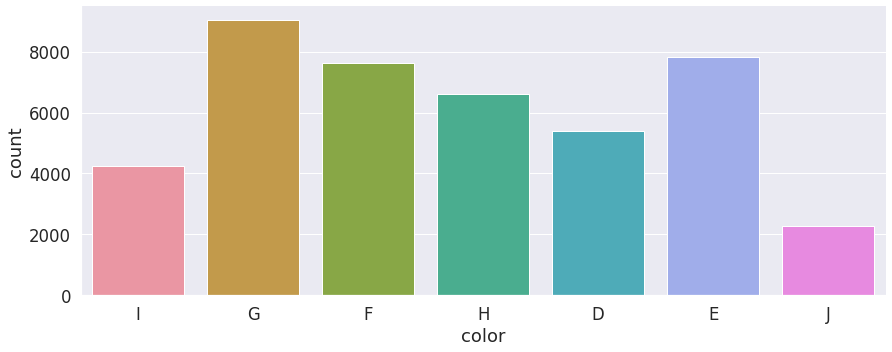

In [ ]:
p = sns.factorplot(x='color', data=diamond_data , kind='count',aspect=2.5 )

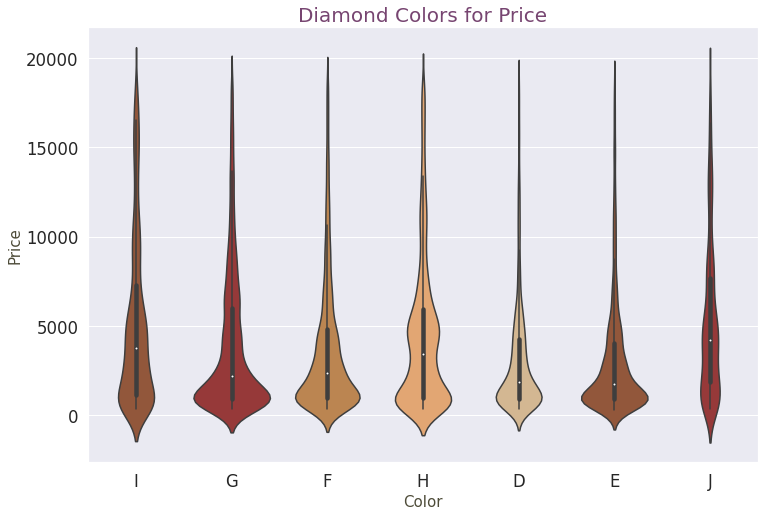

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=diamond_data, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

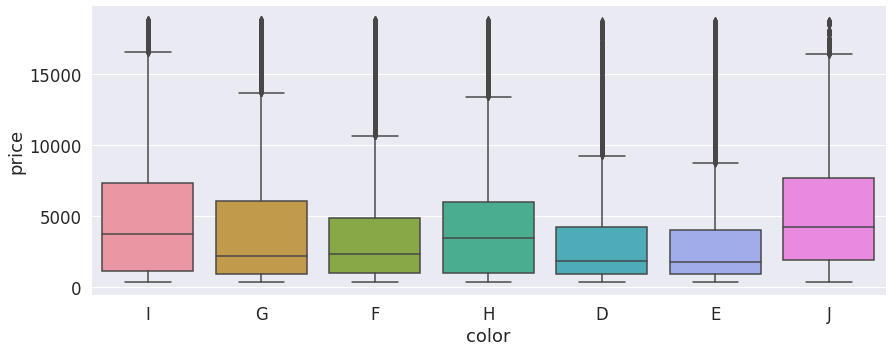

In [ ]:
p = sns.factorplot(x='color', y='price', data=diamond_data, kind='box' ,aspect=2.5 )

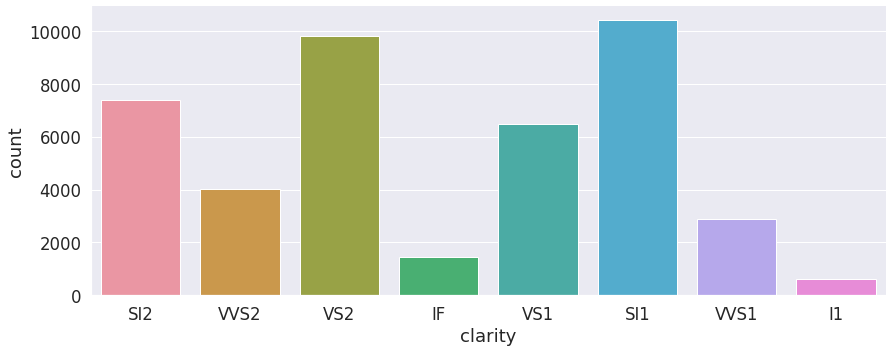

In [ ]:
p = sns.factorplot(x='clarity', data=diamond_data , kind='count',aspect=2.5 )

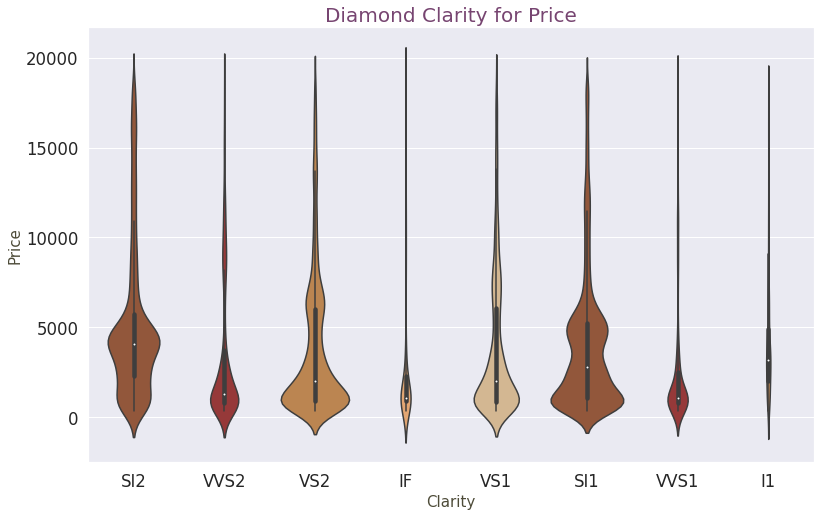

In [ ]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=diamond_data, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

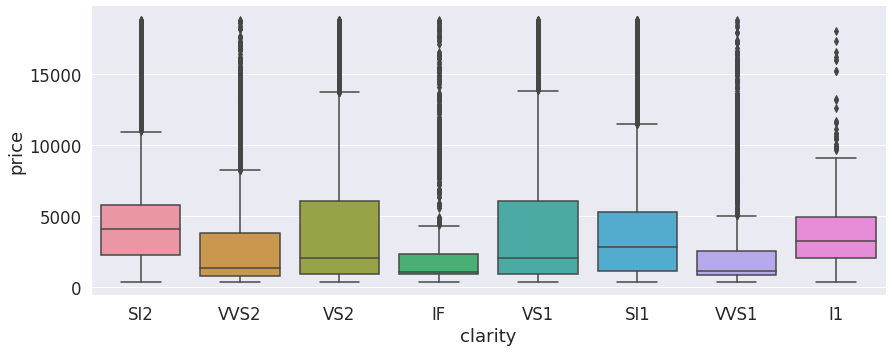

In [ ]:
p = sns.factorplot(x='clarity', y='price', data=diamond_data, kind='box' ,aspect=2.5)

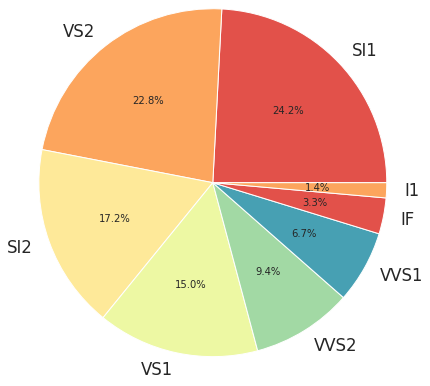

In [ ]:
#Pie Chart
plt.figure(figsize=(10,4))

plt.pie(diamond_data.clarity.value_counts(), autopct="%.1f%%", radius=2.0, labels=['SI1','VS2','SI2','VS1','VVS2','VVS1','IF','I1'])

plt.show()

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): 

### Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive. 
### For example in the cut category, be it ideal, fair or any other type, there are diamonds in those categories with high prices. 

#### *It somehow makes me feel that these categories have less of an influence on the price.*

#### So far so good but what about the categorical data in the columns cut,clarity and color?? The model doesn't take strings!!

In [ ]:
#How each feature affects the price of diamonds
correlations = diamond_data.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.921864
x        0.887122
z        0.864745
y        0.862800
table    0.128029
depth   -0.013395
Name: price, dtype: float64

It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

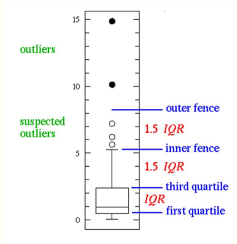
### Removing outliers by filling with NAN values

In [ ]:
def outliers(df_data,var):
    a = []
    q1 =  df_data[var].quantile(.25)
    q2 =  df_data[var].quantile(.5)
    q3 =  df_data[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in  df_data[var]:
        if i > ulim:
            i=np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in  diamond_data.select_dtypes(exclude='object').columns:
     #if (col =='depth'):
       diamond_data[col] = outliers(diamond_data,col)

In [ ]:
#removing outliers & fill it with mean values
for i in diamond_data.select_dtypes(exclude='object').columns:
  #if (i =='depth'):
    diamond_data[i]=diamond_data[i].fillna(diamond_data[i].mean())

In [19]:
# Make copy to avoid changing original data 
df = diamond_data.copy()

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

In [21]:
diamond_cat= df.dtypes[df.dtypes == 'object'].index

#make ordinalEncoder in this categories

df[diamond_cat] = ordinal_encoder.fit_transform(df[diamond_cat])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,4.0,1.0,1.0,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3.0,3.0,5.0,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,4.0,4.0,3.0,61.3,56.0,828,4.43,4.41,2.71
3,0.53,4.0,3.0,3.0,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3.0,2.0,5.0,61.0,57.0,2596,5.76,5.72,3.50


In [22]:
df['space'] = df['x'] * df['y']
df['volume'] = df['x'] * df['y'] *df['z']

In [23]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
carat      0.921864
space      0.900020
volume     0.899709
x          0.887122
z          0.864745
y          0.862800
table      0.128029
depth     -0.013395
cut       -0.055590
clarity   -0.146976
color     -0.171111
Name: price, dtype: float64

In [24]:
df.drop(['x','y','z'], axis = 1, inplace = True)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,space,volume
0,1.06,4.0,1.0,1.0,61.8,57.0,4270,43.3620,176.483340
1,1.51,3.0,3.0,5.0,60.9,58.0,15164,54.7596,246.965796
2,0.32,4.0,4.0,3.0,61.3,56.0,828,19.5363,52.943373
3,0.53,4.0,3.0,3.0,61.2,56.0,1577,27.0918,86.422842
4,0.70,3.0,2.0,5.0,61.0,57.0,2596,32.9472,115.315200


### Data Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['carat','depth','table','space','volume']])

In [27]:
scaling_df =  pd.DataFrame(data_scaled,columns=['carat','depth','table','space','volume'],index=df.index)
df.drop(['carat','depth','table','space','volume'],axis=1,inplace = True)

In [28]:
df= df.join(scaling_df )
df.head()

,cut,color,clarity,price,carat,depth,table,space,volume
0,4.0,1.0,1.0,4270,0.555113,0.037233,-0.205648,0.684275,0.593236
1,3.0,3.0,5.0,15164,1.506643,-0.590082,0.242021,1.527756,1.490611
2,4.0,4.0,3.0,828,-1.009626,-0.311275,-0.653316,-1.078950,-0.979661
3,4.0,3.0,3.0,1577,-0.565579,-0.380977,-0.653316,-0.519804,-0.553404
4,3.0,2.0,5.0,2596,-0.206112,-0.520380,-0.205648,-0.086474,-0.185550


###  Select and Train a Model

In [29]:
#split diamond data into data & labels
from sklearn.model_selection import train_test_split
train_set ,test_set = train_test_split(df,test_size = 0.2,random_state = 42 )

In [30]:
#split diamond data into data & labels
train_diamonds = df.drop(['price'],axis=1)
train_label = df['price']

In [31]:
test_diamonds = test_set.drop(['price'],axis=1)
test_labels = test_set['price']

In [32]:
train_diamonds.head()

,cut,color,clarity,carat,depth,table,space,volume
0,4.0,1.0,1.0,0.555113,0.037233,-0.205648,0.684275,0.593236
1,3.0,3.0,5.0,1.506643,-0.590082,0.242021,1.527756,1.490611
2,4.0,4.0,3.0,-1.009626,-0.311275,-0.653316,-1.078950,-0.979661
3,4.0,3.0,3.0,-0.565579,-0.380977,-0.653316,-0.519804,-0.553404
4,3.0,2.0,5.0,-0.206112,-0.520380,-0.205648,-0.086474,-0.185550


In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [34]:
lin_reg.fit(train_diamonds,train_label)

LinearRegression()

### Training and Evaluating on the Training Set

 Let’s first train a LinearRegression model

In [35]:
from sklearn.metrics import mean_squared_error
diamonds_predictions = lin_reg.predict(train_diamonds)
lin_mse = mean_squared_error(train_label, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1216.3365493199185

Let’s train a Decision Tree Regressor model

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_diamonds,train_label)

DecisionTreeRegressor()

In [37]:
diamonds_predictions = tree_reg.predict(train_diamonds)
tree_mse = mean_squared_error(train_label, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

33.73138212866638

# Better Evaluation Using Cross-Validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,train_diamonds,train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([751.46154259, 719.27631158, 764.9239058 , 712.39528608,
       732.6658855 , 706.92080945, 730.18372722, 701.95541205,
       719.19548727, 800.25436173])

display the resultant scores and calculate its Mean and Standard deviation

In [39]:
# CODE HERE
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [40]:
display_scores(tree_rmse_scores)

Scores: [751.46154259 719.27631158 764.9239058  712.39528608 732.6658855
 706.92080945 730.18372722 701.95541205 719.19548727 800.25436173]
Mean: 733.9232729268685
Standard deviation: 28.86170687355028


repaet the same steps to compute the same scores for the Linear Regression model

In [41]:
lin_scores = cross_val_score(lin_reg, train_diamonds,train_label,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1186.32287784 1200.48734073 1260.0069511  1168.01345869 1253.59638665
 1209.0450342  1288.364838   1194.47081583 1284.1148352  1223.74923122]
Mean: 1226.817176945962
Standard deviation: 40.06531872505619


Let’s train one last model the RandomForestRegressor.

In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_diamonds,train_label)
diamonds_predictions = forest_reg.predict(train_diamonds)

In [43]:
forest_reg.feature_importances_

array([0.00185356, 0.03052216, 0.06331576, 0.0851098 , 0.00387829,
       0.00246845, 0.15054238, 0.6623096 ])

In [44]:
forest_mse = mean_squared_error(train_label, diamonds_predictions)
forest_rmse= np.sqrt(forest_mse)
forest_rmse

206.8191591202489

repeat the same steps to compute the same scores its Mean and Standard deviation for the Random Forest model

In [45]:
forest_scores = cross_val_score(forest_reg,train_diamonds,train_label,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [571.80930281 545.45427125 576.03985507 534.58812635 553.78610922
 544.04065585 545.91252932 527.83303849 527.45393482 615.10599616]
Mean: 554.2023819344456
Standard deviation: 25.574117576453173


# Fine-Tune Your Model

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [60,70,80], 'max_features':[6,7,8]},
              {'bootstrap':[False], 'max_features':[6,7,8],'n_estimators':[70,80]}
]
forest_reg = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=15,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(train_diamonds,train_label)

GridSearchCV(cv=15, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 7, 8],
                          'n_estimators': [60, 70, 80]},
                         {'bootstrap': [False], 'max_features': [6, 7, 8],
                          'n_estimators': [70, 80]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 80}

In [48]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=80, random_state=42)

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

552.6252104321932 {'max_features': 6, 'n_estimators': 60}
551.7353200582401 {'max_features': 6, 'n_estimators': 70}
551.4386079872902 {'max_features': 6, 'n_estimators': 80}
554.8222095141529 {'max_features': 7, 'n_estimators': 60}
553.4198512758165 {'max_features': 7, 'n_estimators': 70}
552.9467684646082 {'max_features': 7, 'n_estimators': 80}
558.3948355908659 {'max_features': 8, 'n_estimators': 60}
556.8637112873588 {'max_features': 8, 'n_estimators': 70}
556.2629140897803 {'max_features': 8, 'n_estimators': 80}
587.5425349976064 {'bootstrap': False, 'max_features': 6, 'n_estimators': 70}
586.9600912134649 {'bootstrap': False, 'max_features': 6, 'n_estimators': 80}
611.9038696276449 {'bootstrap': False, 'max_features': 7, 'n_estimators': 70}
611.6831815202083 {'bootstrap': False, 'max_features': 7, 'n_estimators': 80}
702.6641673602553 {'bootstrap': False, 'max_features': 8, 'n_estimators': 70}
702.660292527754 {'bootstrap': False, 'max_features': 8, 'n_estimators': 80}


In [50]:
final_model =  grid_search.best_estimator_

# Evaluating on the Test Set

In [51]:
final_predictions = final_model.predict(test_diamonds)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse 

207.7491520515907